In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
load('/oak/stanford/groups/mrivas/projects/PRS/private_output/20200908_PRS_map_test/HC382/1_fit_w_val/snpnet.RData')


In [8]:
data.frame(train = fit$metric.train, val = fit$metric.val) %>%
drop_na() -> metric_df


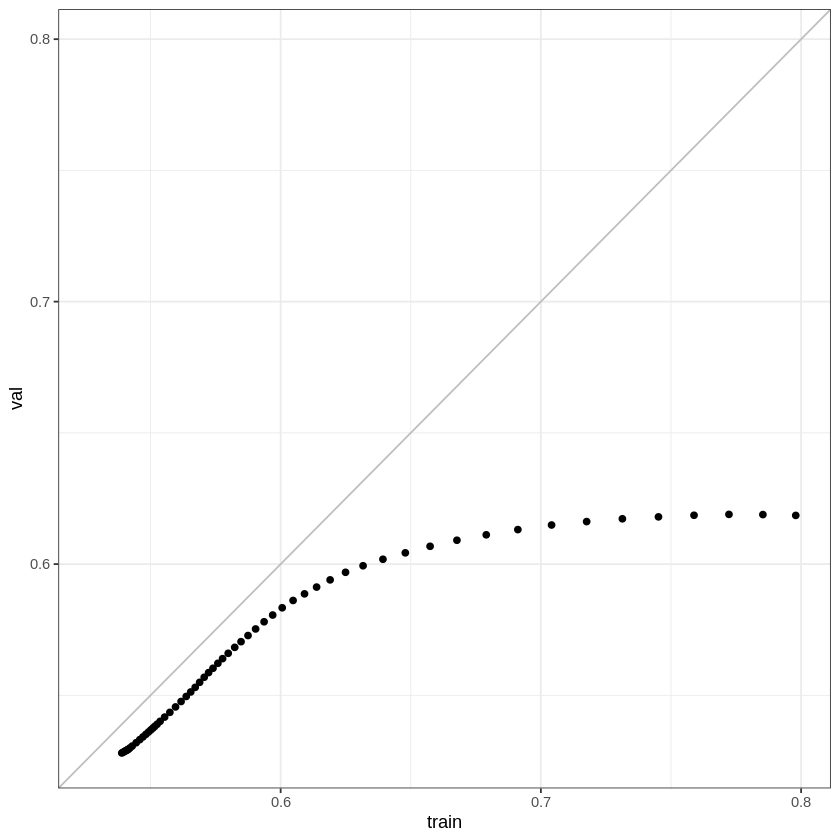

In [15]:
metric_df %>%
ggplot(aes(x=train, y=val)) +
geom_point() +
theme_bw() +
xlim(min(metric_df), max(metric_df)) +
ylim(min(metric_df), max(metric_df)) +
geom_abline(slope=1, intercept=0, color='gray') 

In [18]:
data(aSAH)

In [17]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [20]:
# Basic example with 2 roc objects
roc1 <- roc(aSAH$outcome, aSAH$s100b)
roc2 <- roc(aSAH$outcome, aSAH$wfns)


Setting levels: control = Good, case = Poor

Setting direction: controls < cases

Setting levels: control = Good, case = Poor

Setting direction: controls < cases



In [21]:
roc.test(roc1, roc2)



	DeLong's test for two correlated ROC curves

data:  roc1 and roc2
Z = -2.209, p-value = 0.02718
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.7313686   0.8236789 


In [22]:
roc.test(roc1, roc2, method="bootstrap")


	Bootstrap test for two correlated ROC curves

data:  roc1 and roc2
D = -2.2139, boot.n = 2000, boot.stratified = 1, p-value = 0.02684
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.7313686   0.8236789 
